In [231]:
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')

In [233]:
df1 = df

In [234]:
#Make sure all columns are visble while printing
pd.set_option("display.max_columns" , 100)
df1.head(2)

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True


The dataset has 250 rows


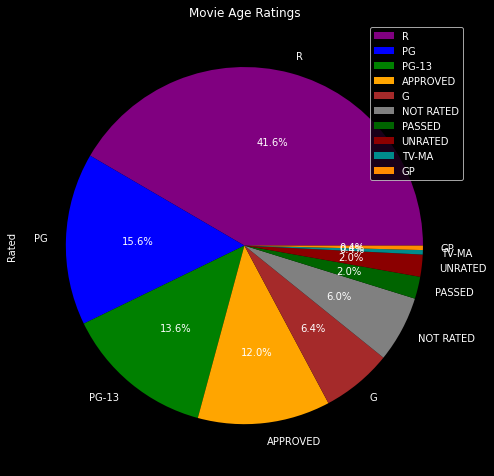

To avoid recommending movies that are inapproriate for the user, we will recommend movies with the similar or lesser age rating to what the user has watched.


In [235]:
#print the number of rows
print(f"The dataset has {df1.shape[0]} rows")
# Plot the pie chart of the ratings 
df1.Rated.value_counts().plot(kind='pie', figsize=(8,10), autopct = '%1.1f%%' ,colors=["purple" , "blue" , "green" , "orange" , "brown" , "gray" , "darkgreen" , "darkred" , "darkcyan" , "darkorange"], legend = True)
plt.title('Movie Age Ratings')
plt.show()
print("To avoid recommending movies that are inapproriate for the user, we will recommend movies with the similar or lesser age rating to what the user has watched.")

In [236]:
# we will check if any movie has been repeated in the dataset
#print(df1.duplicated().sum())
#Since no duplicates were found we will proceed by checking for na values
#print(df1.isnull().sum())
#There are many na values in some of the columns in the dataset but since we won't be using those columns we will leave it as it is.

In [237]:
#List fo columns that we will be using to make our recommendations
column_list = ['Title', 'Genre', 'Director', 'Actors', 'Plot', 'Rated' , 'Country'] 
# make a column that has all the values of each column_list 
df1['combined'] = df1[column_list].apply(lambda x: ' '.join(x), axis=1)

In [238]:
#let us remove the stopwords from the combined column and stem the words also.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stopwords = set(stopwords.words('english'))
def clean_sentence(text):
    #Tokenize the sentence
    word_tokens = word_tokenize(text)
    #Remove the stopwords
    clean_sentence = [w for w in word_tokens if not w in stopwords]
    # stem the words
    clean_sentence = [ps.stem(w) for w in clean_sentence]
    #Join the words back into a sentence
    return " ".join(clean_sentence)

In [239]:
# Apply the clean sentence function to the combined column
df1['combined'] = df1['combined'].apply(clean_sentence)

In [240]:
# print the combined column
print(df1['combined'])

0      the shawshank redempt crime , drama frank dara...
1      the godfath crime , drama franci ford coppola ...
2      the godfath : part ii crime , drama franci for...
3      the dark knight action , crime , drama christo...
4      12 angri men crime , drama sidney lumet martin...
                             ...                        
245    the lost weekend drama , film-noir billi wilde...
246    short term 12 drama destin daniel cretton brie...
247    hi girl friday comedi , drama , romanc howard ...
248    the straight stori biographi , drama david lyn...
249    slumdog millionair drama danni boyl , loveleen...
Name: combined, Length: 250, dtype: object


In [241]:
# remove all the columns except the column we are going to use to make our recommendations
df1 = df1[['Title', 'Genre', 'Director', 'Actors', 'Plot', 'Rated' , 'Country' , 'combined']]
df1.head(2)

,Title,Genre,Director,Actors,Plot,Rated,Country,combined
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,R,USA,"the shawshank redempt crime , drama frank dara..."
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,R,USA,"the godfath crime , drama franci ford coppola ..."


In [242]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Create a count vectorizer object
cv = CountVectorizer()
# Fit the vectorizer to the combined column
count_matrix = cv.fit_transform(df1["combined"])
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix)

In [243]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    id = df1[df1.Title == title].index[0]
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[id]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies, we don't want the element at 0 th index beacuse that will be the same movie.
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df1.iloc[movie_indices]


In [244]:
# get the top 10 most similar movies to the movie 'The Dark Knight' 
movie_name = "The Dark Knight"
movie_recommendation_indices = get_recommendations(movie_name)
# We will recommend movies to the user based on the rating of the movie the user has seen.
mature_ratings = ["R", "APPROVED" , "PASSED" , "NOT RATED" , "UNRATED" , "TV-MA"]
premature_ratings = ["PG-13" , "PG" , "G" , "GP"]
# Get the index of the movie_name
movie_name_index = df1[df.Title == movie_name].index[0]
for i in range(len(movie_recommendation_indices)):
    if df1['Rated'][movie_name_index] in premature_ratings:
        if df1['Rated'][i] in mature_ratings:
            pass
    print(df1.iloc[movie_recommendation_indices.index[i]]['Title'])

The Dark Knight Rises
The Prestige
Batman Begins
Guardians of the Galaxy Vol. 2
The Green Mile
Harry Potter and the Deathly Hallows: Part 2
Interstellar
The Lord of the Rings: The Fellowship of the Ring
Inception
The Martian


In [245]:
#The End!